### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Conversión segura de los precios a numéricos y un manejando errores silenciosamente
tienda['Precio'] = pd.to_numeric(tienda['Precio'], errors='coerce')
tienda2['Precio'] = pd.to_numeric(tienda2['Precio'], errors='coerce')
tienda3['Precio'] = pd.to_numeric(tienda3['Precio'], errors='coerce')
tienda4['Precio'] = pd.to_numeric(tienda4['Precio'], errors='coerce')

# Calcular los ingresos de cada tienda y crear un diccionario para almacenar la facturación por tienda
facturacion = {
    'Tienda 1': tienda['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum()
}

# Mostrar resultados tienda por tienda
print("Facturación individual por tienda:\n")
for tienda, total in facturacion.items():
    print(f"{tienda}: ${total:,.2f}")

# Calcular y mostrar facturación total
facturacion_total = sum(facturacion.values())
print(f"\n Facturación total de todas las tiendas: ${facturacion_total:,.2f}")

# Identificar tienda con mayor y menor facturación
tienda_mayor = max(facturacion, key=facturacion.get)
tienda_menor = min(facturacion, key=facturacion.get)

print(f"\n Tienda con mayor facturación: {tienda_mayor} (${facturacion[tienda_mayor]:,.2f})")
print(f" Tienda con menor facturación: {tienda_menor} (${facturacion[tienda_menor]:,.2f})")


Facturación individual por tienda:

Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00

 Facturación total de todas las tiendas: $4,403,619,200.00

 Tienda con mayor facturación: Tienda 1 ($1,150,880,400.00)
 Tienda con menor facturación: Tienda 4 ($1,038,375,700.00)


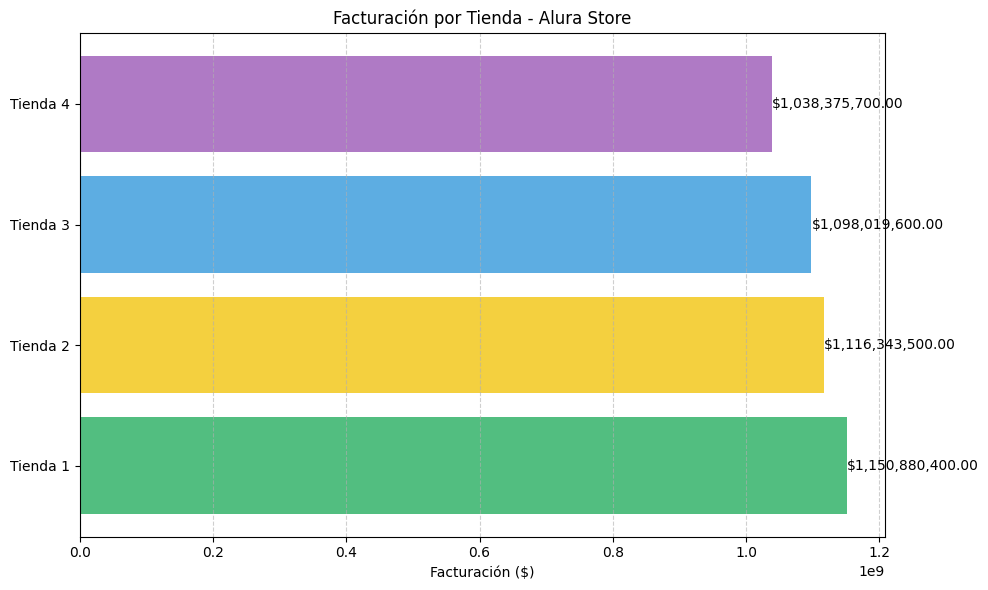

In [ ]:
import matplotlib.pyplot as plt

# Preparar datos para el gráfico
nombres_tiendas = list(facturacion.keys())
valores_facturacion = list(facturacion.values())

colores = ['#52be80', '#f4d03f', '#5dade2', '#af7ac5']

# Crear gráfico de barras horizontal
plt.figure(figsize=(10, 6))
barras = plt.barh(nombres_tiendas, valores_facturacion, color=colores)

# Etiquetas y título
plt.xlabel('Facturación ($)')
plt.title('Facturación por Tienda - Alura Store')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Mostrar los valores al final de cada barra
for barra in barras:
    ancho = barra.get_width()
    plt.text(ancho + 1000, barra.get_y() + barra.get_height()/2,
             f"${ancho:,.2f}", va='center')

plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [ ]:
# Diccionario para guardar el conteo de ventas por categoría
ventas_categoria_por_tienda = {}

# Agrupar ventas por categoría para cada tienda
tiendas_dict = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Recorremos cada tienda y contamos los productos vendidos por categoría
for nombre_tienda, df in tiendas_dict.items():
    conteo_categorias = df['Categoría del Producto'].value_counts()
    ventas_categoria_por_tienda[nombre_tienda] = conteo_categorias
    print(f"\nVentas por categoría en {nombre_tienda}:\n{conteo_categorias}")



Ventas por categoría en Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Ventas por categoría en Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Ventas por categoría en Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64

Ven

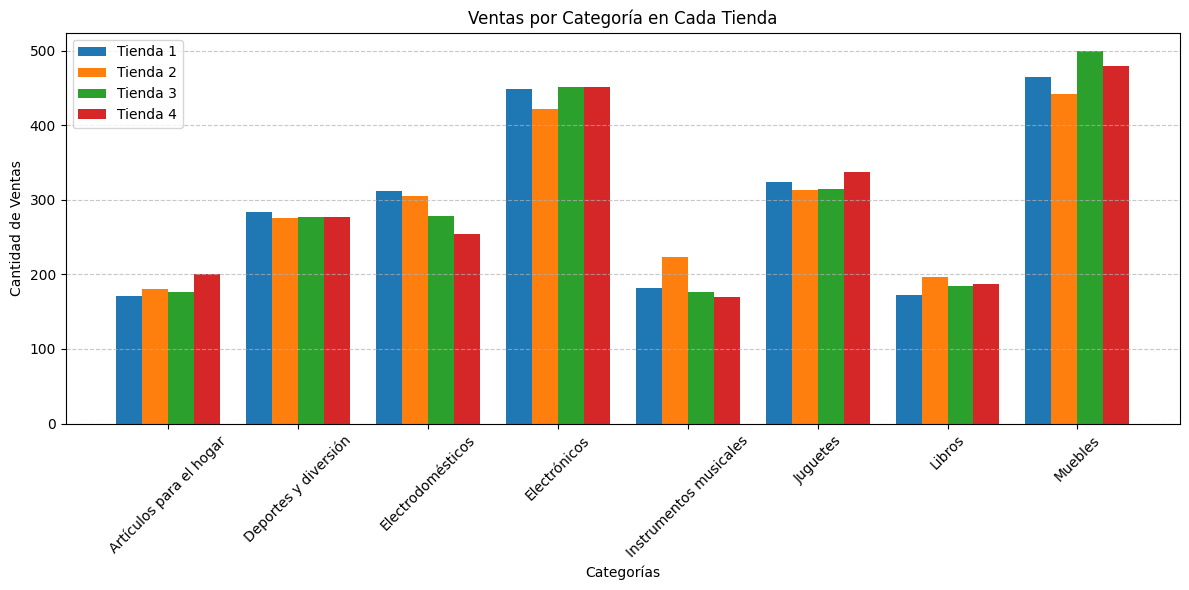

In [ ]:

import matplotlib.pyplot as plt

# Crear un diccionario con las tiendas
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Obtener conteos de ventas por categoría por tienda
ventas_por_categoria = {}

for nombre, df in tiendas.items():
    conteo = df['Categoría del Producto'].value_counts()
    ventas_por_categoria[nombre] = conteo

# Convertir a DataFrame y llenar NaNs con 0
df_categorias = pd.DataFrame(ventas_por_categoria).fillna(0).astype(int)

# Crear gráfico de barras agrupadas
categorias = df_categorias.index
bar_width = 0.2
x = range(len(categorias))

plt.figure(figsize=(12, 6))

# Dibujar cada barra con desplazamiento horizontal
for i, tienda in enumerate(df_categorias.columns):
    plt.bar(
        [p + bar_width*i for p in x],
        df_categorias[tienda],
        width=bar_width,
        label=tienda
    )

# Ajustes de gráfico
plt.xlabel('Categorías')
plt.ylabel('Cantidad de Ventas')
plt.title('Ventas por Categoría en Cada Tienda')
plt.xticks([p + 1.5*bar_width for p in x], categorias, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
# Diccionario con las tiendas
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Calcular la calificación promedio de cada tienda
calificaciones_promedio = {}

for nombre, df in tiendas.items():
    promedio = df['Calificación'].mean()
    calificaciones_promedio[nombre] = promedio
    print(f'Calificación promedio de {nombre}: {promedio:.2f}')

# Si quieres convertirlo en DataFrame para uso posterior (por ejemplo, para graficar)
df_calificaciones = pd.DataFrame.from_dict(calificaciones_promedio, orient='index', columns=['Calificación Promedio'])


Calificación promedio de Tienda 1: 3.98
Calificación promedio de Tienda 2: 4.04
Calificación promedio de Tienda 3: 4.05
Calificación promedio de Tienda 4: 4.00


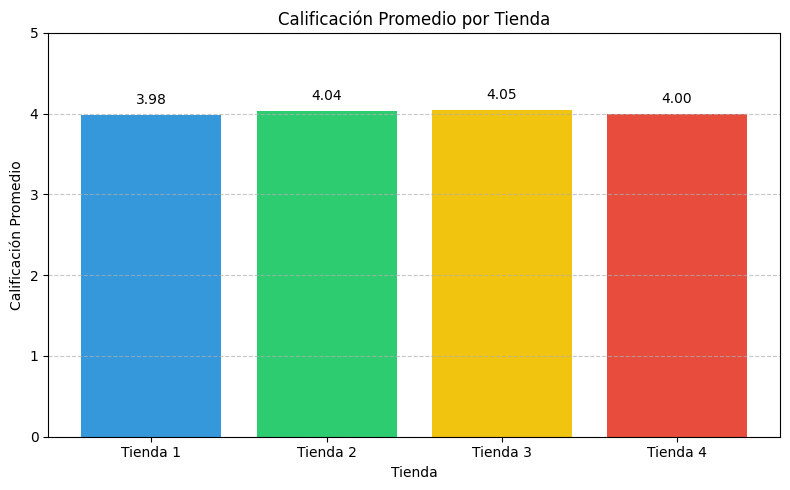

In [ ]:


# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
barras = plt.bar(df_calificaciones.index, df_calificaciones['Calificación Promedio'], color=['#3498db', '#2ecc71', '#f1c40f', '#e74c3c'])

# Etiquetas
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5)  # Rango típico de calificación
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir los valores encima de las barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + 0.1, f'{altura:.2f}', ha='center', va='bottom')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos


Top 5 productos MÁS vendidos en Tienda 1:
           Producto  Cantidad Vendida
0        Microondas                60
1     TV LED UHD 4K                60
2           Armario                60
3  Secadora de ropa                58
4     Mesa de noche                56

Top 5 productos MENOS vendidos en Tienda 1:
                      Producto  Cantidad Vendida
0  Ciencia de datos con Python                39
1                    Pandereta                36
2              Olla de presión                35
3    Auriculares con micrófono                33
4                 Celular ABXY                33


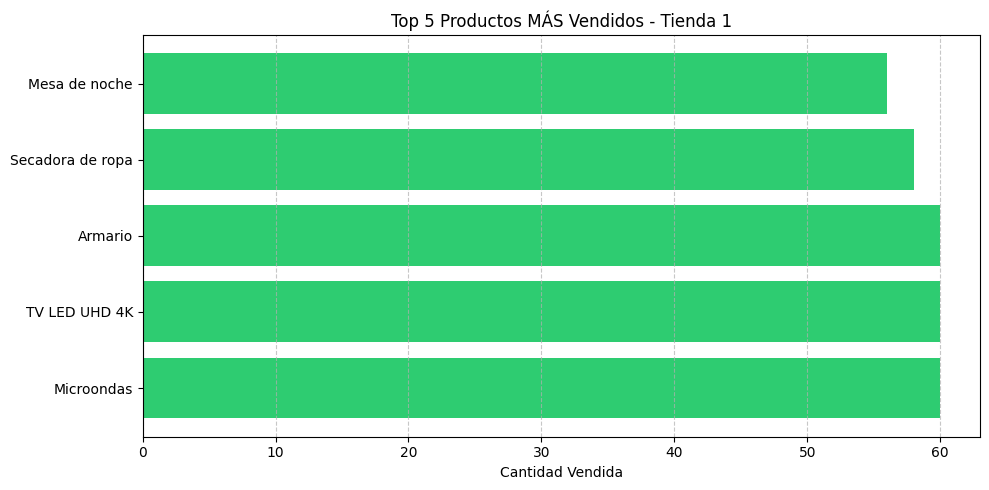

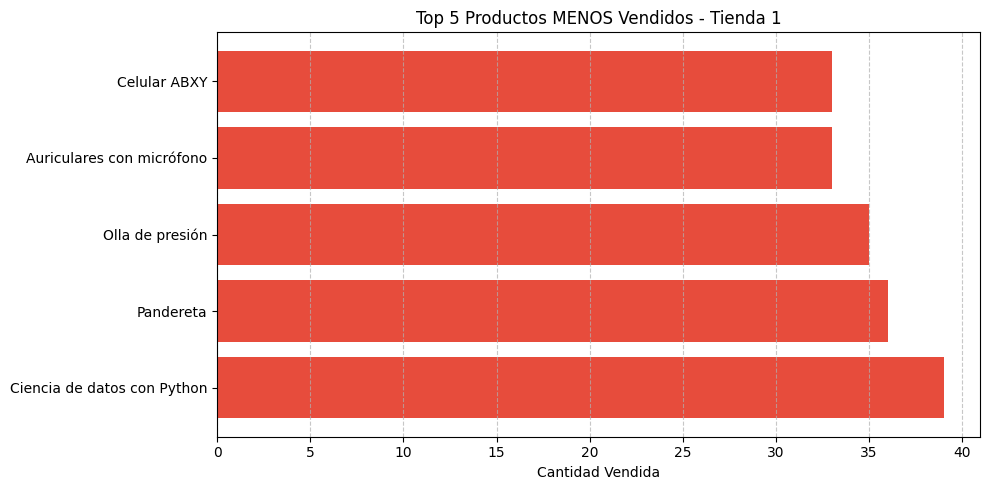


Top 5 productos MÁS vendidos en Tienda 2:
                    Producto  Cantidad Vendida
0  Iniciando en programación                65
1                 Microondas                62
2                    Batería                61
3          Guitarra acústica                58
4                  Pandereta                58

Top 5 productos MENOS vendidos en Tienda 2:
          Producto  Cantidad Vendida
0      Auriculares                37
1           Sillón                35
2  Mesa de comedor                34
3        Impresora                34
4    Juego de mesa                32


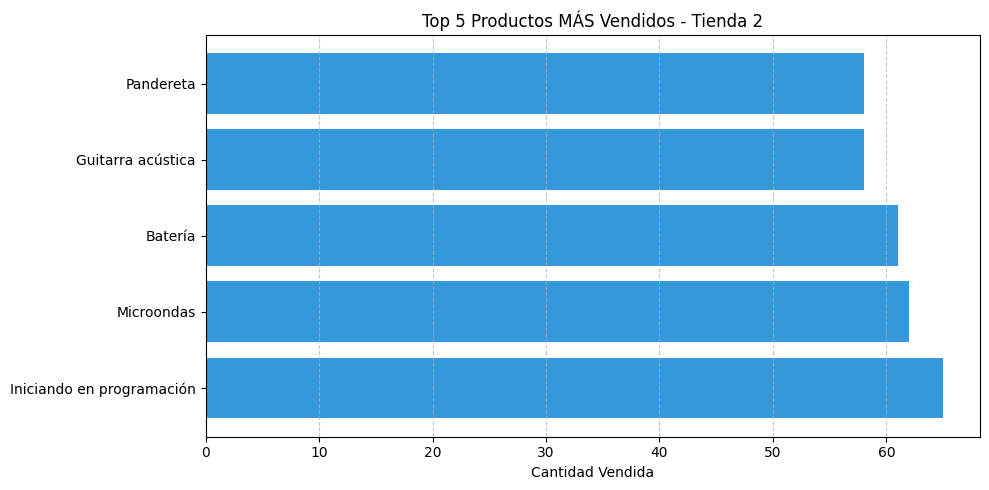

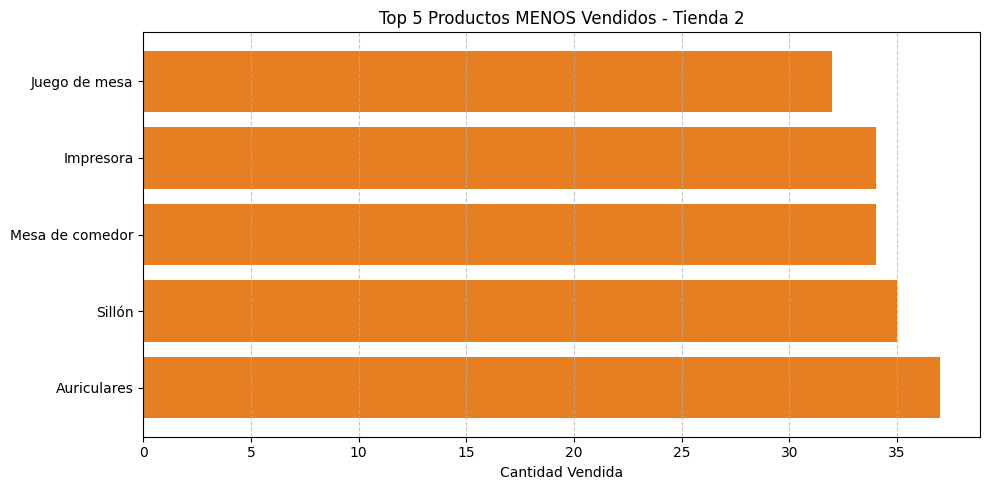


Top 5 productos MÁS vendidos en Tienda 3:
          Producto  Cantidad Vendida
0    Kit de bancas                57
1  Mesa de comedor                56
2        Cama king                56
3     Set de ollas                55
4    Mesa de noche                55

Top 5 productos MENOS vendidos en Tienda 3:
                  Producto  Cantidad Vendida
0       Guitarra eléctrica                38
1             Set de vasos                36
2                  Mochila                36
3               Microondas                36
4  Bloques de construcción                35


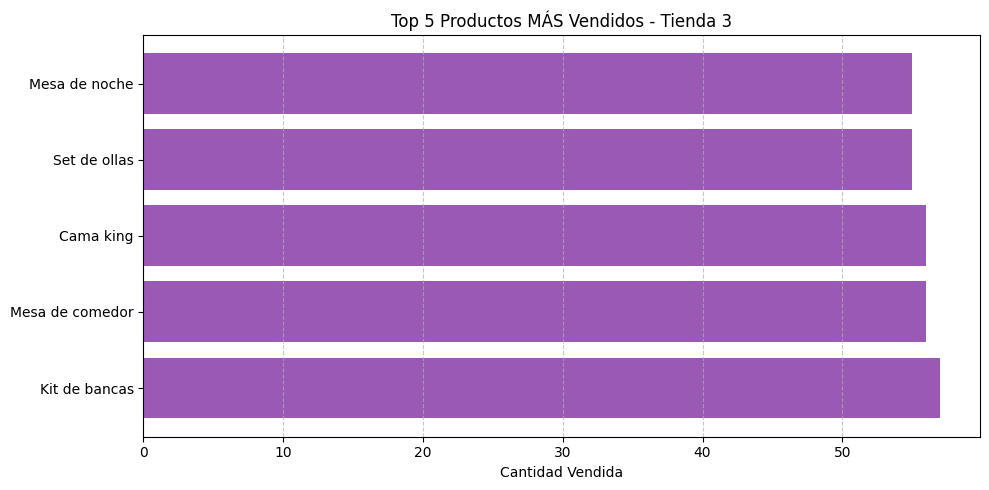

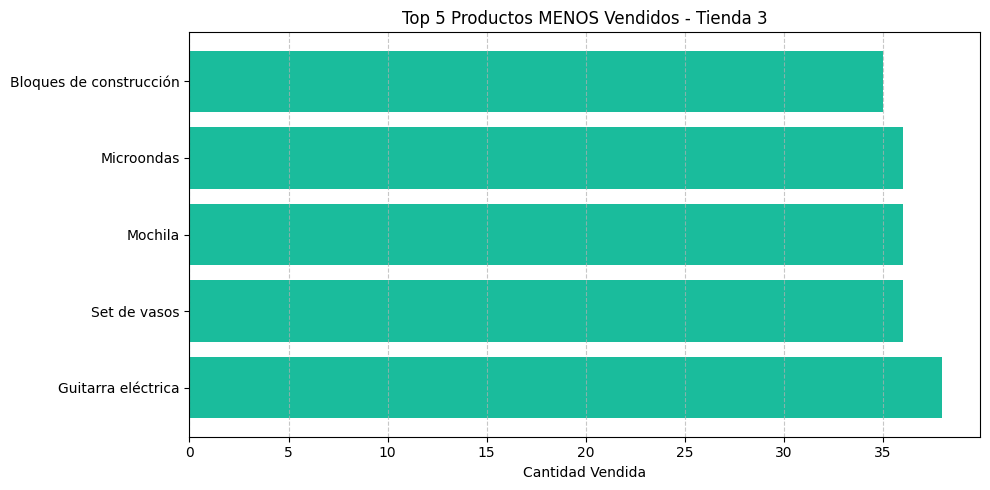


Top 5 productos MÁS vendidos en Tienda 4:
                    Producto  Cantidad Vendida
0                   Cama box                62
1                 Cubertería                59
2    Dashboards con Power BI                56
3                  Cama king                56
4  Carrito de control remoto                55

Top 5 productos MENOS vendidos en Tienda 4:
                      Producto  Cantidad Vendida
0                 Refrigerador                38
1  Ciencia de datos con Python                38
2            Guitarra acústica                37
3                      Armario                34
4           Guitarra eléctrica                33


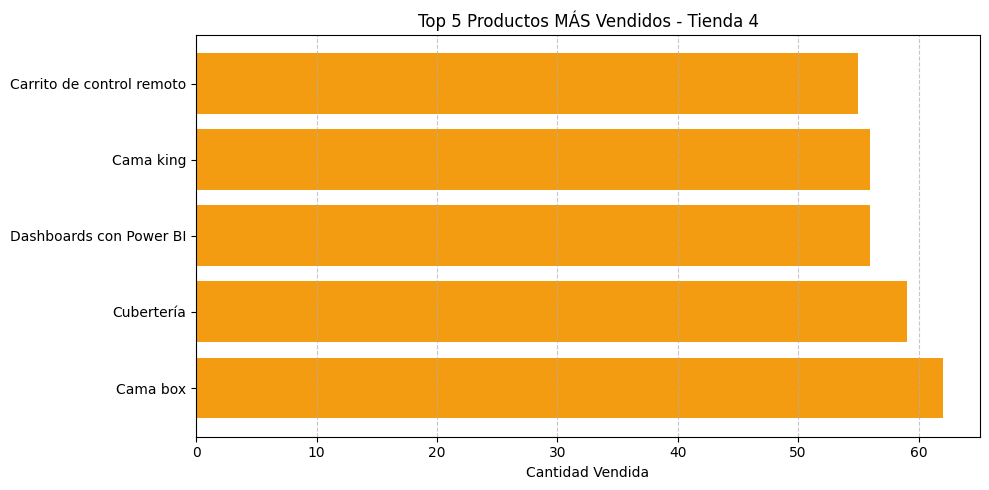

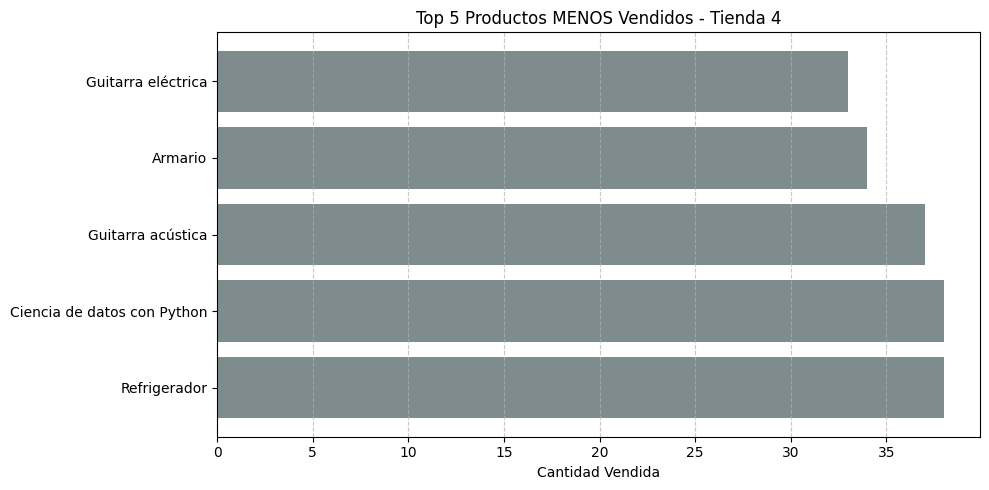

In [ ]:

# Diccionario con nombres de tiendas y sus DataFrames
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Colores para diferenciar cada gráfico
colores_top = ['#2ecc71', '#3498db', '#9b59b6', '#f39c12']
colores_bottom = ['#e74c3c', '#e67e22', '#1abc9c', '#7f8c8d']

# Iterar sobre las tiendas y mostrar los productos más y menos vendidos
for i, (nombre, df) in enumerate(tiendas.items()):
    # Top 5 más vendidos
    top_5 = df['Producto'].value_counts().head(5).reset_index()
    top_5.columns = ['Producto', 'Cantidad Vendida']

    # Bottom 5 menos vendidos
    bottom_5 = df['Producto'].value_counts().tail(5).reset_index()
    bottom_5.columns = ['Producto', 'Cantidad Vendida']

    # Mostrar tablas
    print(f"\nTop 5 productos MÁS vendidos en {nombre}:")
    print(top_5)
    print(f"\nTop 5 productos MENOS vendidos en {nombre}:")
    print(bottom_5)

    # Gráfico TOP 5
    plt.figure(figsize=(10, 5))
    plt.barh(top_5['Producto'], top_5['Cantidad Vendida'], color=colores_top[i])
    plt.xlabel('Cantidad Vendida')
    plt.title(f'Top 5 Productos MÁS Vendidos - {nombre}')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Gráfico BOTTOM 5
    plt.figure(figsize=(10, 5))
    plt.barh(bottom_5['Producto'], bottom_5['Cantidad Vendida'], color=colores_bottom[i])
    plt.xlabel('Cantidad Vendida')
    plt.title(f'Top 5 Productos MENOS Vendidos - {nombre}')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# 5. Envío promedio por tienda

In [ ]:
# Calcular el costo de envío promedio por tienda
envio_promedio1 = tienda['Costo de envío'].mean()
envio_promedio2 = tienda2['Costo de envío'].mean()
envio_promedio3 = tienda3['Costo de envío'].mean()
envio_promedio4 = tienda4['Costo de envío'].mean()

# Mostrar resultados de forma más compacta
envios_promedio = {
    'Tienda 1': envio_promedio1,
    'Tienda 2': envio_promedio2,
    'Tienda 3': envio_promedio3,
    'Tienda 4': envio_promedio4
}

for tienda, costo in envios_promedio.items():
    print(f"Envío promedio - {tienda}: ${costo:.2f}")


Envío promedio - Tienda 1: $26018.61
Envío promedio - Tienda 2: $25216.24
Envío promedio - Tienda 3: $24805.68
Envío promedio - Tienda 4: $23459.46


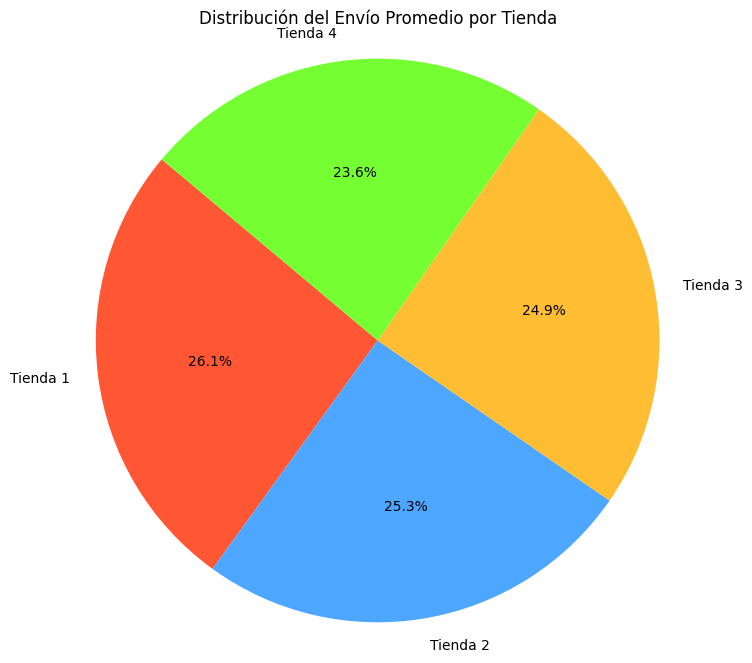

In [ ]:

# Datos
envios_promedio = {
    'Tienda 1': envio_promedio1,
    'Tienda 2': envio_promedio2,
    'Tienda 3': envio_promedio3,
    'Tienda 4': envio_promedio4
}

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(envios_promedio.values(), labels=envios_promedio.keys(), autopct='%1.1f%%', startangle=140, colors=['#ff5733', '#4da6ff', '#ffbd33', '#75ff33'])

# Título
plt.title('Distribución del Envío Promedio por Tienda')

# Mostrar el gráfico
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()


## Informe Final


# *Introducción*

El Sr. Juan está considerando vender una de sus tiendas de la cadena Alura Store con el objetivo de destinar ese capital a un nuevo proyecto empresarial. Para tomar una decisión informada, se llevó a cabo un análisis detallado del desempeño de las cuatro tiendas, basado en datos reales de ventas, reseñas de clientes y costos operativos. Entre los criterios evaluados se encuentran: los ingresos totales por tienda, las categorías de productos más y menos vendidas, la valoración promedio de los clientes, los productos con mayor y menor rotación y el valor medio de los envíos. Este informe resume los hallazgos más relevantes y concluye con una recomendación sustentada en los datos obtenidos.

# *Desarrollo*

**1. Ingresos Totales**

Al observar las cifras de facturación, la Tienda 1 encabeza el ranking con los ingresos más altos. Le siguen las Tiendas 2 y 3, con cifras relativamente cercanas entre sí. En contraste, la Tienda 4 presenta una diferencia considerable, siendo la que menos ingresos generó en el periodo analizado. Esta baja rentabilidad puede deberse a diversos factores como una cartera de clientes más limitada o una menor rotación de productos.

**2. Análisis de Categorías de Productos**

En todas las tiendas se ofrece el mismo catálogo de categorías. Sin embargo, los datos muestran que "Muebles" y "Electrónicos" lideran las ventas en las tiendas con mejor desempeño (especialmente en Tienda 1 y Tienda 3). La Tienda 4, aunque mantiene cierta fuerza en "Juguetes", no logra destacar en ninguna categoría de forma contundente. Además, las categorías como "Libros" e "Instrumentos Musicales" tienen bajos niveles de ventas en casi todas las tiendas.

**3. Calificaciones Promedio**

La evaluación promedio otorgada por los clientes se mantiene estable en todas las tiendas, rondando los 4 puntos sobre 5. No obstante, aunque la Tienda 1 tiene la calificación más baja dentro del grupo, esta diferencia es marginal y parece estar relacionada con su mayor volumen de ventas. La Tienda 4 mantiene una calificación aceptable, pero no se posiciona como la mejor en experiencia del cliente.

**4. Productos Más y Menos Vendidos**

Los productos más vendidos pertenecen principalmente a las categorías de muebles y electrónica, reafirmando su popularidad. Los productos menos vendidos son similares entre tiendas y se concentran en libros, juguetes menos conocidos y algunos artículos musicales. En la Tienda 4, tanto los productos más vendidos como los menos vendidos presentan cifras bajas, lo que evidencia una falta de rotación general en el inventario.

**5. Costo de Envío Promedio**

El análisis del costo de envío revela que las tiendas con mayor volumen de ventas tienden a presentar costos más altos, como es el caso de la Tienda 1. La Tienda 4 tiene el costo de envío promedio más bajo, lo que podría indicar un menor número de transacciones o una operación más limitada en términos logísticos.

# *Conclusión*
Después de analizar todos los indicadores clave, la Tienda 4 se presenta como la candidata más adecuada para ser vendida. A lo largo de todos los criterios evaluados, esta tienda muestra un rendimiento inferior de manera consistente:

*   Tiene los ingresos más bajos.

*   No destaca en ninguna categoría de productos.

*   Posee un menor volumen de ventas tanto en productos como en envíos.

*   Su calificación de clientes no es superior a las demás.

*   Presenta poca rotación de inventario, lo cual puede afectar su rentabilidad a largo plazo.

Vender esta tienda le permitirá al Sr. Juan optimizar recursos, concentrarse en unidades de negocio más sólidas y potencialmente reinvertir en estrategias que fortalezcan la operación de las tiendas restantes. Esta decisión está respaldada por un análisis cuantitativo riguroso y por una comprensión clara de las oportunidades de mejora.

